# Compare V4 structure with GBS allfiltu

## Make .gen file with refs and AllGBS samps

In [25]:
python ../MA2genepop.py All_GBS_Test/GenotypeArea_Katherine_DB52_02192020_03272020_GBS_1_AC_filt.xls \
refV4.gen All_GBS_Test/AllGBS_refs_V4.gen -i2 All_GBS_Test/GenotypeArea_Katherine_DB39_02192020_03272020_GBS_1_AC_filt.xls \
$(cat ../Running_Panel/V4badSNPs) 

In [2]:
library(strataG)
library(adegenet)
library(reshape2)
library(plyr)
library(dplyr)

Loading required package: ade4

   /// adegenet 2.1.2 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [23]:
#old_path <- Sys.getenv("PATH")

#Sys.setenv(PATH = paste(old_path, "/home/kes0132/Software/CLUMPPdir", sep = ":"))

In [3]:
ad <- read.genepop("All_GBS_Test/AllGBS_refs_V4.gen")
ad


 Converting data from a Genepop .gen file to a genind object... 


File description:  MA 

...done.



/// GENIND OBJECT /////////

 // 141 individuals; 73 loci; 146 alleles; size: 135 Kb

 // Basic content
   @tab:  141 x 146 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 146 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: read.genepop(file = "All_GBS_Test/AllGBS_refs_V4.gen")

 // Optional content
   @pop: population of each individual (group size range: 48-93)

In [4]:
dict = read.table("popconvert_DB",header = T)

In [5]:
sites = substr(indNames(ad),1,2)
species = sites
map = setNames( as.vector(dict$SpeciesNum),as.vector(dict$Pop))
species[] <- map[unlist(sites)]
pop(ad) <- species

In [6]:
numRefs <- 48
pflagMap <- c(rep(1,numRefs),rep(0,length(indNames(ad))-numRefs))
names(pflagMap) <- indNames(ad)

In [7]:
gi.g <- genind2gtypes(ad)
gi.g


<<< gtypes created on 2020-06-03 10:03:13 >>>

Contents: 141 samples, 73 loci, 4 strata
Other info: genind

Strata summary:
  stratum num.ind num.missing num.alleles
1       1      51  1.30136986    1.575342
2       2      39  0.21917808    1.561644
3       3      28  0.02739726    1.054795
4       4      23  0.80821918    2.000000


In [8]:
pflag = c(rep(0,length(indNames(ad))))
#map = setNames(as.vector(pflag),as.vector(names(pflag)))
pflag[] <- pflagMap[unlist(getIndNames(gi.g))]
pflag <- as.numeric(pflag)

In [9]:
cbind(getIndNames(gi.g),getStrata(gi.g), pflag)

,,,pflag
ALL01,ALL01,4,0
ALL02,ALL02,4,0
ALL03,ALL03,4,0
ALL04,ALL04,4,0
ALL05,ALL05,4,0
ALL06,ALL06,4,0
ALL10,ALL10,4,0
ALL11,ALL11,4,0
ALL12,ALL12,4,0
CAN11619rB,CAN11619rB,2,1


In [10]:
sr <- structureRun(gi.g, label = "V4_GBS",k.range = c(3), num.k.rep = 3
                   ,burnin=20000,numreps=200000,noadmix=F, freqscorr=T,pop.prior = "usepopinfo",migrprior = 0.01,popflag=pflag,delete.files = FALSE)

In [11]:
q.mat <- clumpp(sr, k = 3)
q.mat

id,pct.miss,orig.pop,Group.1,Group.2,Group.3
ALL01,0,4,0.2060,0.4870,0.3070
ALL02,0,4,0.1901,0.4033,0.4066
ALL03,0,4,0.1690,0.4600,0.3710
ALL04,0,4,0.2347,0.4613,0.3040
ALL05,0,4,0.2214,0.4555,0.3231
ALL06,0,4,0.2678,0.3648,0.3675
ALL10,0,4,0.1347,0.4912,0.3741
ALL11,0,4,0.2273,0.5053,0.2673
ALL12,0,4,0.2798,0.3777,0.3424
CAN11619rB,0,2,0.0000,1.0000,0.0000


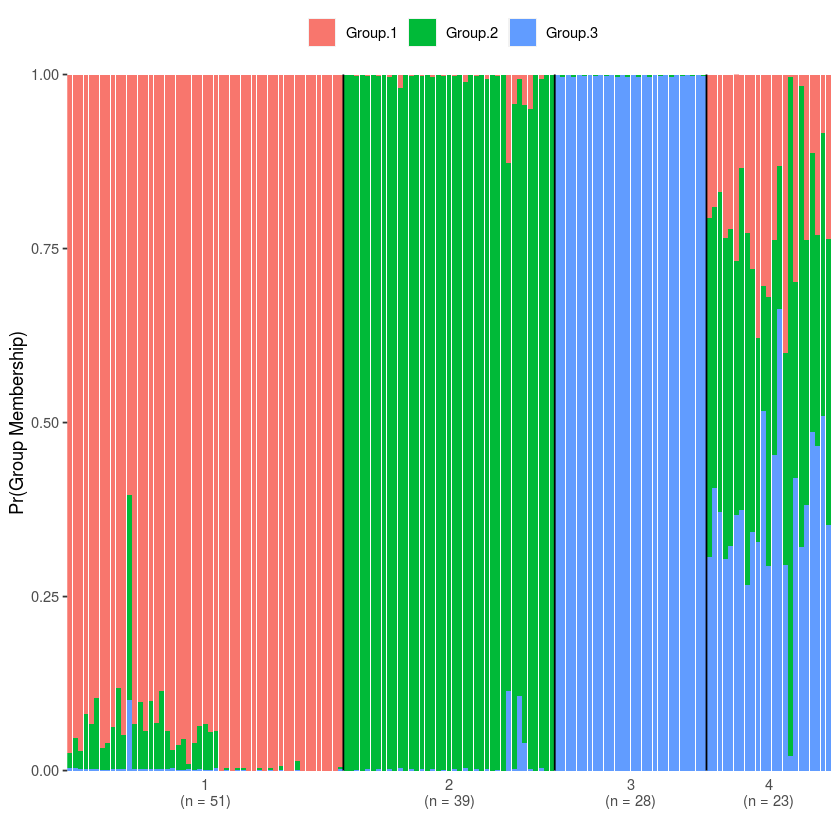

In [12]:
structurePlot(q.mat,horiz=F, sort.probs=F, type="bar")

In [13]:
q.mat[which(q.mat$orig.pop == 4),]

,id,pct.miss,orig.pop,Group.1,Group.2,Group.3
1,ALL01,0,4,0.2060,0.4870,0.3070
2,ALL02,0,4,0.1901,0.4033,0.4066
3,ALL03,0,4,0.1690,0.4600,0.3710
4,ALL04,0,4,0.2347,0.4613,0.3040
5,ALL05,0,4,0.2214,0.4555,0.3231
6,ALL06,0,4,0.2678,0.3648,0.3675
7,ALL10,0,4,0.1347,0.4912,0.3741
8,ALL11,0,4,0.2273,0.5053,0.2673
9,ALL12,0,4,0.2798,0.3777,0.3424
68,GU36,0,4,0.3780,0.2940,0.3280


In [14]:
# extract tests
test = c(c(77:103),114,116,119,122,124,126,129,137,
         12,14,16,18,20,22,24,26,28,30,32,34,36,38,c(109:113),139,
        41,43,45,47,49,51,53,55,57,59,61,63,65,67,
        c(1:9),c(68:76),c(104:108))
t.qmat <- q.mat[test,]
head(t.qmat)

,id,pct.miss,orig.pop,Group.1,Group.2,Group.3
77,MATT01,1,1,0.9743,0.0227,0.003
78,MATT02,1,1,0.9530,0.0440,0.003
79,MATT04,0,1,0.9720,0.0260,0.002
80,MATT05,1,1,0.9190,0.0790,0.002
81,MATT06,1,1,0.9330,0.0650,0.002
82,MATT07,1,1,0.8960,0.1020,0.002


In [15]:
ma.label = mapvalues(t.qmat$id,from=c('ALL01',
'ALL10',
'CANOT11829g',
'CANOT11830g',
'CANOT11832g',
'CANOT11838g',
'CANOT2617g',
'DB12041g',
'DB2589g',
'DB2590g',
'DB2592g',
'DB2593g',
'DB2634g',
'DB2635g',
'DB2637g',
'FL01g',
'FL09g',
'FL12g',
'FL15g',
'FL16_Bg',
'FL20g',
'FL21g',
'FL23g',
'FL30g',
'FLF17g',
'FLM10g',
'FLM12g',
'FLM13g',
'FLM15g',
'RM1_B',
'SL04g',
'SL10g',
'SL14g',
'SL15g',
'SL16g',
'SL19g',
'SL2g',
'SL8g',
'TN11851g'),
         to=c('ALLATOONA01',
'ALLATOONA10',
'CANOT11829',
'CANOT11830',
'CANOT11832',
'CANOT11838',
'CANOT2617',
'DB12041',
'DB2589',
'DB2590',
'DB2592',
'DB2593',
'DB2634',
'DB2635',
'DB2637',
'FL01',
'FL09',
'FL12',
'FL15',
'FL16',
'FL20',
'FL21',
'FL23',
'FL30',
'FLF17',
'FLM10',
'FLM12',
'FLM13',
'FLM15',
'RM1',
'SL04',
'SL10',
'SL14',
'SL15',
'SL16',
'SL19',
'SL2',
'SL8',
'TN11851'
))

In [16]:
t.qmat$id <- ma.label
colnames(t.qmat) <- c("Label","pct.miss", "Pop", "NB","DB","FL")

In [17]:
# load allfiltu result
allfilt = read.table("../Analysis/allfiltu/allfiltu_qmat.tab",header = T,stringsAsFactors = F)

In [18]:
dc_gbs <- dcast(allfilt, Label + Pop ~ cluster_relabeled,value.var="mean_prob")
colnames(dc_gbs) <- c("Label", "Pop", "NB","DB","FL")
head(dc_gbs)

Label,Pop,NB,DB,FL
ALL02,4,0.205,0.4470,0.348
ALL03,4,0.167,0.5450,0.288
ALL04,4,0.257,0.4300,0.313
ALL05,4,0.219,0.4190,0.361
ALL06,4,0.301,0.4246,0.274
ALL11,4,0.227,0.4638,0.309


In [53]:
mergedc <- merge(dc_gbs, t.qmat, by=c("Label","Pop"),all = F) 
colnames(mergedc) <- c("Label","Pop","NB.gbs","DB.gbs","FL.gbs","missing","NB.MA","DB.MA","FL.MA")
mutate(mergedc, NB.diff=NB.MA-NB.gbs) %>%
mutate(DB.diff=DB.MA-DB.gbs) %>%
mutate(FL.diff=FL.MA-FL.gbs) %>% arrange(desc(abs(NB.diff)))
#mergedc

Label,Pop,NB.gbs,DB.gbs,FL.gbs,missing,NB.MA,DB.MA,FL.MA,NB.diff,DB.diff,FL.diff
LA1136,4,0.0170,0.7840,0.1990,50,0.2987,0.2810,0.4203,0.2817,-0.5030,0.2213
Mill22,1,0.8850,0.1006,0.0140,19,0.6040,0.2950,0.1010,-0.2810,0.1944,0.0870
GU45,4,0.4770,0.3090,0.2140,9,0.3190,0.3873,0.2937,-0.1580,0.0783,0.0797
RM1,4,0.1596,0.4040,0.4360,0,0.2370,0.4097,0.3533,0.0774,0.0057,-0.0827
NBM01,1,0.9560,0.0440,0.0000,2,0.8860,0.1120,0.0020,-0.0700,0.0680,0.0020
RM11,4,0.1830,0.3492,0.4678,0,0.1133,0.4002,0.4865,-0.0697,0.0510,0.0187
NB13,1,0.9690,0.0310,0.0000,1,0.9000,0.0980,0.0020,-0.0690,0.0670,0.0020
GU57,4,0.1900,0.1610,0.6490,0,0.1320,0.2053,0.6627,-0.0580,0.0443,0.0137
SL04,1,1.0000,0.0000,0.0000,16,0.9430,0.0540,0.0030,-0.0570,0.0540,0.0030
MATT07,1,0.9490,0.0510,0.0000,1,0.8960,0.1020,0.0020,-0.0530,0.0510,0.0020


In [30]:
write.table(mergedc,"compV4_gbs.diff",row.names=F,quote=F)

# Try V5

In [32]:
python ../MA2genepop.py All_GBS_Test/GenotypeArea_Katherine_DB52_02192020_03272020_GBS_1_AC_filt.xls \
refV5.gen All_GBS_Test/AllGBS_refs_V5.gen -i2 All_GBS_Test/GenotypeArea_Katherine_DB39_02192020_03272020_GBS_1_AC_filt.xls \
$(cat ../Running_Panel/V5badSNPs) 

In [33]:
ad <- read.genepop("All_GBS_Test/AllGBS_refs_V5.gen")
ad


 Converting data from a Genepop .gen file to a genind object... 


File description:  MA 

...done.



/// GENIND OBJECT /////////

 // 141 individuals; 69 loci; 138 alleles; size: 128.4 Kb

 // Basic content
   @tab:  141 x 138 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 138 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: read.genepop(file = "All_GBS_Test/AllGBS_refs_V5.gen")

 // Optional content
   @pop: population of each individual (group size range: 48-93)

In [34]:
dict = read.table("popconvert_DB",header = T)

In [35]:
sites = substr(indNames(ad),1,2)
species = sites
map = setNames( as.vector(dict$SpeciesNum),as.vector(dict$Pop))
species[] <- map[unlist(sites)]
pop(ad) <- species

In [36]:
numRefs <- 48
pflagMap <- c(rep(1,numRefs),rep(0,length(indNames(ad))-numRefs))
names(pflagMap) <- indNames(ad)

In [37]:
gi.g <- genind2gtypes(ad)
gi.g


<<< gtypes created on 2020-06-03 10:55:11 >>>

Contents: 141 samples, 69 loci, 4 strata
Other info: genind

Strata summary:
  stratum num.ind num.missing num.alleles
1       1      51  0.97101449    1.550725
2       2      39  0.20289855    1.565217
3       3      28  0.02898551    1.057971
4       4      23  0.75362319    2.000000


In [38]:
pflag = c(rep(0,length(indNames(ad))))
#map = setNames(as.vector(pflag),as.vector(names(pflag)))
pflag[] <- pflagMap[unlist(getIndNames(gi.g))]
pflag <- as.numeric(pflag)

In [40]:
sr5 <- structureRun(gi.g, label = "V5_GBS",k.range = c(3), num.k.rep = 3
                   ,burnin=20000,numreps=200000,noadmix=F, freqscorr=T,pop.prior = "usepopinfo",migrprior = 0.01,popflag=pflag,delete.files = FALSE)

In [41]:
q.mat5 <- clumpp(sr5, k = 3)
q.mat5

id,pct.miss,orig.pop,Group.1,Group.2,Group.3
ALL01,0,4,0.2140,0.4890,0.2970
ALL02,0,4,0.1890,0.3990,0.4120
ALL03,0,4,0.1890,0.4330,0.3780
ALL04,0,4,0.2187,0.4897,0.2917
ALL05,0,4,0.2477,0.4231,0.3291
ALL06,0,4,0.2717,0.3763,0.3520
ALL10,0,4,0.1483,0.4703,0.3813
ALL11,0,4,0.2593,0.4620,0.2787
ALL12,0,4,0.2560,0.3877,0.3563
CAN11619rB,0,2,0.0000,1.0000,0.0000


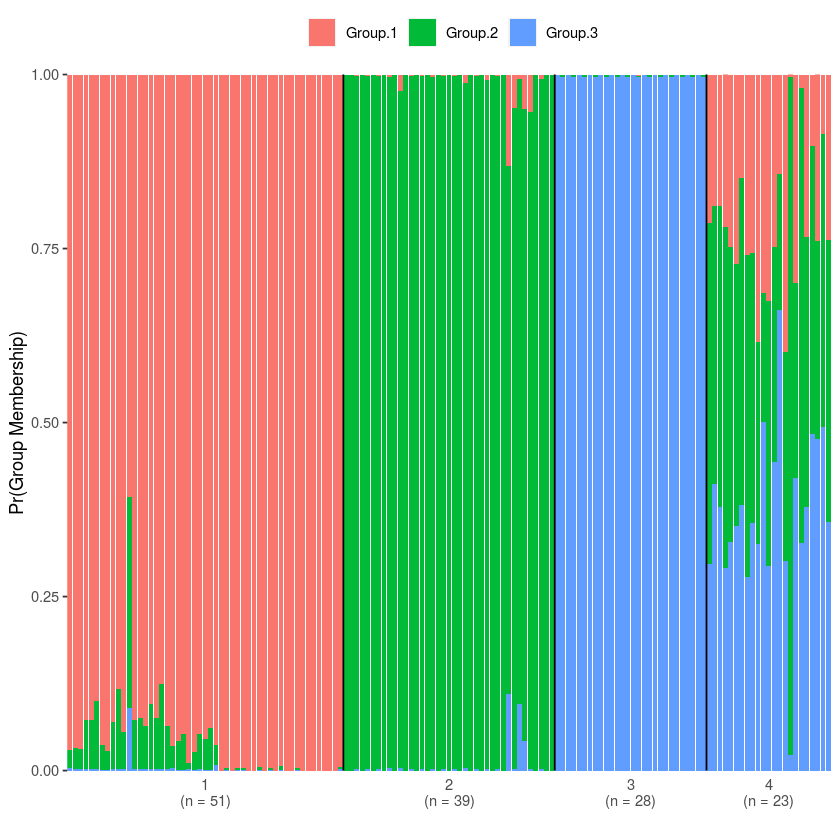

In [43]:
structurePlot(q.mat5,horiz=F, sort.probs=F, type="bar")

In [50]:
# extract tests
test = c(c(77:103),114,116,119,122,124,126,129,137,
         12,14,16,18,20,22,24,26,28,30,32,34,36,38,c(109:113),139,
        41,43,45,47,49,51,53,55,57,59,61,63,65,67,
        c(1:9),c(68:76),c(104:108))
t.qmat5 <- q.mat5[test,]
head(t.qmat5)

,id,pct.miss,orig.pop,Group.1,Group.2,Group.3
77,MATT01,0,1,0.9710,0.0260,0.003
78,MATT02,0,1,0.9680,0.0300,0.002
79,MATT04,0,1,0.9690,0.0290,0.002
80,MATT05,0,1,0.9280,0.0700,0.002
81,MATT06,0,1,0.9270,0.0710,0.002
82,MATT07,1,1,0.8997,0.0983,0.002


In [51]:
t.qmat5$id <- ma.label
colnames(t.qmat5) <- c("Label","pct.miss", "Pop", "NB","DB","FL")

In [52]:
mergedc <- merge(dc_gbs, t.qmat5, by=c("Label","Pop"),all = F) 
colnames(mergedc) <- c("Label","Pop","NB.gbs","DB.gbs","FL.gbs","missing","NB.MA","DB.MA","FL.MA")
mutate(mergedc, NB.diff=NB.MA-NB.gbs) %>%
mutate(DB.diff=DB.MA-DB.gbs) %>%
mutate(FL.diff=FL.MA-FL.gbs) %>% arrange(desc(abs(NB.diff)))
#mergedc

Label,Pop,NB.gbs,DB.gbs,FL.gbs,missing,NB.MA,DB.MA,FL.MA,NB.diff,DB.diff,FL.diff
LA1136,4,0.0170,0.7840,0.1990,47,0.2988,0.2805,0.4207,0.2818,-0.5035,0.2217
Mill22,1,0.8850,0.1006,0.0140,20,0.6070,0.3030,0.0900,-0.2780,0.2024,0.0760
GU45,4,0.4770,0.3090,0.2140,8,0.3257,0.3800,0.2943,-0.1513,0.0710,0.0803
RM11,4,0.1830,0.3492,0.4678,0,0.1027,0.4133,0.4840,-0.0803,0.0641,0.0162
NBM01,1,0.9560,0.0440,0.0000,1,0.8760,0.1220,0.0020,-0.0800,0.0780,0.0020
RM1,4,0.1596,0.4040,0.4360,0,0.2377,0.4053,0.3570,0.0781,0.0013,-0.0790
NB13,1,0.9690,0.0310,0.0000,1,0.9040,0.0940,0.0020,-0.0650,0.0630,0.0020
MATT07,1,0.9490,0.0510,0.0000,1,0.8997,0.0983,0.0020,-0.0493,0.0473,0.0020
GU57,4,0.1900,0.1610,0.6490,0,0.1427,0.1953,0.6620,-0.0473,0.0343,0.0130
Otter23,1,0.9270,0.0730,0.0000,2,0.9740,0.0250,0.0010,0.0470,-0.0480,0.0010


In [30]:
write.table(mergedc,"compV4_gbs.diff",row.names=F,quote=F)

In [ ]:
merged <- merge(QallregC,Qv2pure, by=c("Label","cluster_relabeled"))
merged$cluster_relabeled <- c("NB","DB","FL",merged$cluster_relabeled)[match(merged$cluster_relabeled, c("1","2","3",merged$cluster_relabeled))]
ggplot(merged, aes(x = mean_prob.x, y = mean_prob.y, colour = cluster_relabeled)) + geom_point() + 
  ggtitle("Comparing Structure runs") + ylab("AllGBS_V2 Pure") + xlab("allfilt Reg") +
  geom_abline(intercept = 0, slope = 1)